# Phishing Capstone Project

In [14]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from IPython.core.display import HTML
import numpy as np
import seaborn as sns

In [15]:
# Files courtesy of Brandon Rhodes: https://github.com/brandon-rhodes/pycon-pandas-tutorial
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Data Wrangling

In [16]:
# data
data = pd.read_csv('datasets/phishing_data.csv')

In [17]:
# deleting existing index column, and reindexing starting at 0 for consistency
data['index'] = data.index
data.index.name = 'index'
data.drop("index", axis=1, inplace=True)
data.shape

(11055, 31)

In [18]:
pd.set_option('display.max_columns', None) 
data.head(3)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### Renaming Columns

In [19]:
new_cols = ['url_contains_ip_address', 'url_length', 'shortening_service',
       'url_contains_at_symbol', 'url_contains_double_slash', 'url_contains_dash',
       'url_contains_sub_domain', 'ssl_final_state', 'domain_registeration_period',
       'external_url_favicon', 'standard_ports', 'url_contains_https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'status_bar_change', 'right_click_disabled', 'popup_window', 'uses_iframe',
       'age_of_domain', 'dns_record_available', 'web_traffic', 'page_rank',
       'google_index_exists', 'links_pointing_to_page', 'statistical_report',
       'result']
data.columns = new_cols

In [20]:
data.head(3)

,url_contains_ip_address,url_length,shortening_service,url_contains_at_symbol,url_contains_double_slash,url_contains_dash,url_contains_sub_domain,ssl_final_state,domain_registeration_period,external_url_favicon,standard_ports,url_contains_https_token,request_url,url_of_anchor,links_in_tags,sfh,submitting_to_email,abnormal_url,redirect,status_bar_change,right_click_disabled,popup_window,uses_iframe,age_of_domain,dns_record_available,web_traffic,page_rank,google_index_exists,links_pointing_to_page,statistical_report,result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### Data dictionary

In [21]:
for col in data.columns:
    if col != 'result':
        print(data.groupby([col, 'result']).size().unstack('result'))

result                     -1     1
url_contains_ip_address            
-1                       1926  1867
 1                       2972  4290
result        -1     1
url_length            
-1          4079  4881
 0            83    52
 1           736  1224
result                -1     1
shortening_service            
-1                   514   930
 1                  4384  5227
result                    -1     1
url_contains_at_symbol            
-1                       837   818
 1                      4061  5339
result                       -1     1
url_contains_double_slash            
-1                          562   867
 1                         4336  5290
result                 -1       1
url_contains_dash                
-1                 4898.0  4692.0
 1                    NaN  1465.0
result                     -1     1
url_contains_sub_domain            
-1                       1836  1527
 0                       2252  1370
 1                        810  3260
result   

In [22]:
# nested data dict.
data_dict = defaultdict(lambda: defaultdict(str))
data_dict['url_contains_ip_address'][-1] = 'T'
data_dict['url_contains_ip_address'][1] = 'F'

data_dict['url_length'][-1] = '< 54 chars'
data_dict['url_length'][0] = '54 to 75'
data_dict['url_length'][1] = '> 75 chars'

data_dict['shortening_service'][-1] = 'T'
data_dict['shortening_service'][1] = 'F'

data_dict['url_contains_at_symbol'][-1] = 'T'
data_dict['url_contains_at_symbol'][1] = 'F'

data_dict['url_contains_double_slash'][-1] = 'T'
data_dict['url_contains_double_slash'][1] = 'F'

data_dict['url_contains_dash'][-1] = 'T'
data_dict['url_contains_dash'][1] = 'F'

data_dict['url_contains_sub_domain'][-1] = '1 dot in domain part'
data_dict['url_contains_sub_domain'][0] = '2 dots in domain part'
data_dict['url_contains_sub_domain'][1] = 'more than 2 dots in domain part'

data_dict['ssl_final_state'][-1] = 'does not use https; issuer is not trusted' 
data_dict['ssl_final_state'][0] = 'uses https; issuer is not trusted'
data_dict['ssl_final_state'][1] = 'uses https; issuer is trusted; age of certificate > 1 year'

data_dict['domain_registeration_period'][-1] = 'domain expires in <= 1 year'
data_dict['domain_registeration_period'][1] = 'domain expires in >= 1 year'

data_dict['external_url_favicon'][-1] = 'T'
data_dict['external_url_favicon'][1] = 'F'

data_dict['standard_ports'][-1] = 'T'
data_dict['standard_ports'][1] = 'F'

data_dict['url_contains_https_token'][-1] = 'T'
data_dict['url_contains_https_token'][1] = 'F'

data_dict['request_url'][-1] = '< 22%'
data_dict['request_url'][1] = '> 22%'

data_dict['url_of_anchor'][-1] = '< 31%'
data_dict['url_of_anchor'][0] = '31 to 67'
data_dict['url_of_anchor'][1] = '> 67%'

data_dict['links_in_tags'][-1] = '< 17%'
data_dict['links_in_tags'][0] = '17 to 81'
data_dict['links_in_tags'][1] = '> 81%'

data_dict['sfh'][-1] = 'sfh refers to same domain'
data_dict['sfh'][0] = 'sfh refers to a different domain'
data_dict['sfh'][1] = 'sfh is "about: blank" or empty'

data_dict['submitting_to_email'][-1] = 'T'
data_dict['submitting_to_email'][1] = 'F'

data_dict['abnormal_url'][-1] = 'host name not in url'
data_dict['abnormal_url'][1] = 'host name in url'

data_dict['url_contains_host_name'][-1] = 'F'
data_dict['url_contains_host_name'][1] = 'T'

data_dict['redirect'][0] = '<4'
data_dict['redirect'][1] = '>=4'

data_dict['status_bar_change'][-1] = 'T'
data_dict['status_bar_change'][1] = 'F'

data_dict['right_click_disabled'][-1] = 'T'
data_dict['right_click_disabled'][1] = 'F'

data_dict['popup_window'][-1] = 'T'
data_dict['popup_window'][1] = 'F'

data_dict['uses_iframe'][-1] = 'T'
data_dict['uses_iframe'][1] = 'F'

data_dict['age_of_domain'][-1] = '< 6 months'
data_dict['age_of_domain'][1] = '> 6 months'

data_dict['dns_record_available'][-1] = 'F'
data_dict['dns_record_available'][1] = 'T'

data_dict['web_traffic'][-1] = 'web rank by traffic > 100,000'
data_dict['web_traffic'][0] = 'web rank by traffic not available' 
data_dict['web_traffic'][1] = 'web rank by traffic < 100,000'

data_dict['page_rank'][-1] = 'page rank >= 0.2'
data_dict['page_rank'][1] = 'page rank < 0.2'

data_dict['google_index_exists'][-1] = 'F'
data_dict['google_index_exists'][1] = 'T'

data_dict['links_pointing_to_page'][-1] = '0'
data_dict['links_pointing_to_page'][0] = '0 to 2'
data_dict['links_pointing_to_page'][1] = '>2'

data_dict['statistical_report'][-1] = 'host belongs to top phishing domains, survey by PhishTank'
data_dict['statistical_report'][1] = 'host does not belong to top phishing domains, survey by PhishTank'

In [23]:
acceptable_ports = pd.read_csv('datasets/acceptable_ports.csv')
acceptable_ports

,PORT,Service,Meaning,Preferred Status
0,21,FTP,Transfer files from one host to another,Close
1,22,SSH,Secure File Transfer Protocol,Close
2,23,Telnet,provide a bidirectional interactive text-orien...,Close
3,80,HTTP,Hyper test transfer protocol,Open
4,443,HTTPS,Hypertext transfer protocol secured,Open
5,445,SMB,"Providing shared access to files, printers, se...",Close
6,1433,MSSQL,Store and retrieve data as requested by other ...,Close
7,1521,ORACLE,Access oracle database from web.,Close
8,3306,MySQL,Access MySQL database from web.,Close
9,3389,Remote Desktop,allow remote access and remote collaboration,Close


#### Missing Values & Outliers

In [24]:
[sum(data[i].isnull()) for i in data.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [25]:
[set(data[i]) for i in data.columns]

[{-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1}]

### Exploratory Data Analysis

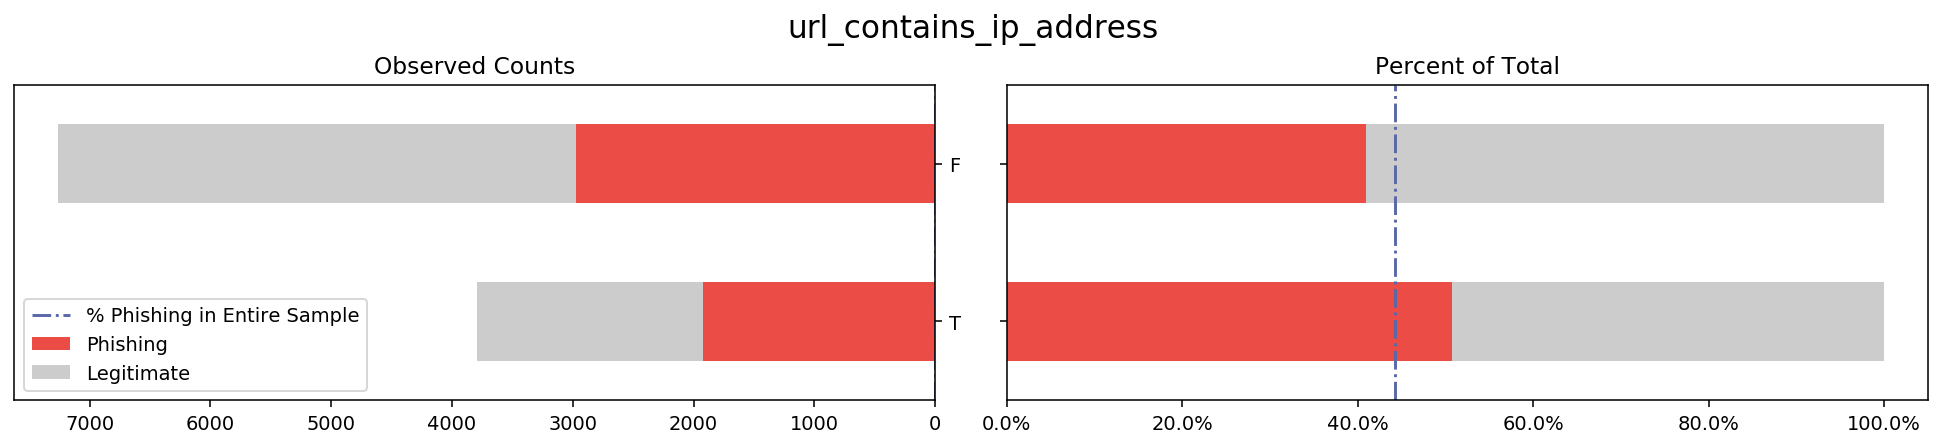

In [26]:
pal = ['#eb4c46', '#cccccc']
prop_phish = pd.DataFrame((data.groupby('result').size())/(data.groupby('result').size().sum())).loc[-1, 0]
for column in data.columns[:1]:
    if column == 'result':
        pass
    else:
        # Figure specs
        fig = plt.figure(figsize=(14, 3), dpi=140)
        fig.suptitle(column, fontsize=16, y=1.05)

        # Divide the figure into a 1x2 grid, and give me the first section

        ax1 = fig.add_subplot(121)

        # Divide the figure into a 1x2 grid, and give me the second section
        ax2 = fig.add_subplot(122)

        # Left groupby and plot
        g_count = data.groupby([column, 'result']).size().unstack('result')
        g_count.plot.barh(stacked = True, ax = ax1, color = pal).invert_xaxis()
        ax1.yaxis.tick_right()
        ax1.set_ylabel('')
        ax1.set_yticklabels(data_dict[column].values())
        ax1.axvline(0, color='#5868a8', linewidth=1.5, linestyle = '-.', label = 'Horizontal')
        ax1.legend(labels=['% Phishing in Entire Sample', 'Phishing', 'Legitimate'])
        #ax1.set_xlabel('Count')
        ax1.set_title('Observed Counts')


        # Right groupby and plot
        g_count2 = data.groupby([column, 'result']).size().unstack(column)
        p = g_count2.divide(g_count2.sum())
        plot2 = p.transpose().plot.barh(stacked = True, ax = ax2, color = pal)
        ax2.get_legend().remove()
        ax2.axvline(prop_phish, color='#5868a8', linewidth=1.5, linestyle = '-.')
        ticks = np.round(ax2.get_xticks()*100)
        ax2.set_xticklabels(['{:}%'.format(j) for j in [str(i) for i in ticks]])
        #ax2.set_xlabel('%')
        ax2.set_ylabel('')
        ax2.set_yticklabels('')
        ax2.set_title('Percent of Total')

        fig.tight_layout()

### Statistical Data Analysis

In [27]:
# Defining necessary functions to see which groups are interesting
def one_minus_mean(data):
    result = 1 - np.mean(data)
    return result


# courtesy of https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [28]:
# changing this to be able to take mean of the bootstrap samples.
data.result[data.result == -1] = 0

In [16]:
# big checking function
# bootstrap replicates
# function automatically selects columns where the pop. prop. of phishing is outside the CI

high_interesting_columns = []
low_interesting_columns = []

for i in data.columns[:30]:    # excluding the result variable
    for j in set(data[i]):     # iterating over possible cateogies
        loop_data = data.result[data[i] == j]    # getting result variable for each category of each feature
        bs_replicates = draw_bs_reps(data=loop_data, func=one_minus_mean, size=10000)
        ci = np.percentile(bs_replicates, [.05, 99.95])
        if ((prop_phish < ci[0])): #interested in the high proportions
            high_interesting_columns.append(i)
        elif ((prop_phish > ci[1])): #low interesting columns
            low_interesting_columns.append(i)
            
    if high_interesting_columns != []:    # check for error when list is empty
        if sum(np.array(high_interesting_columns) == i) == 1:    # removing any columns where only 1 feature was out of CI
            high_interesting_columns.remove(i)
    if low_interesting_columns != []:    # check for error when list is empty
        if sum(np.array(low_interesting_columns) == i) == 1:    # removing any columns where only 1 feature was out of CI
            low_interesting_columns.remove(i)
            
high_interesting_columns = list(set(high_interesting_columns))    # removing duplicate entries
low_interesting_columns = list(set(low_interesting_columns))

print('Interesting columns with CI above sample proportion:', high_interesting_columns)
print('Interesting columns with CI below sample proportion:', low_interesting_columns)

Interesting columns with CI above sample proportion: ['ssl_final_state', 'web_traffic', 'url_contains_sub_domain']
Interesting columns with CI below sample proportion: ['links_pointing_to_page', 'url_of_anchor', 'sfh', 'links_in_tags']


In [29]:
high_interesting_columns = ['ssl_final_state', 'web_traffic', 'url_contains_sub_domain']
low_interesting_columns = ['links_pointing_to_page', 'url_of_anchor', 'sfh', 'links_in_tags']

In [30]:
# Creating a hash table of every combination of interesting columns
# Each key in hash table contains heatmap table of combinations of interesting columns

# custom aggregation function
def prop(series):
    return round(sum(series)/len(series), 2)

#scalable solution
def heatmap_dict(heatmap_dict, interesting_columns):
    heatmap_dict = {}

    for i in range(len(interesting_columns)):
        for j in range(i+1, len(interesting_columns)):
            working_df = data[[interesting_columns[i], interesting_columns[j], 'result']].\
                         groupby([interesting_columns[i], interesting_columns[j]]).agg(prop).unstack(interesting_columns[j])

            working_df.columns = working_df.columns.droplevel() # remove 'result' from columns multindex

            heatmap_dict[interesting_columns[i], interesting_columns[j]] = working_df

    return heatmap_dict

In [31]:
low_heatmap_dict = {}
low_heatmap_dict = heatmap_dict(low_heatmap_dict, low_interesting_columns)
low_heatmap_dict

{('links_pointing_to_page',
  'url_of_anchor'): url_of_anchor             -1     0     1
 links_pointing_to_page                  
 -1                      0.08  0.77  0.95
  0                      0.00  0.68  0.94
  1                      0.02  0.77  0.94,
 ('links_pointing_to_page', 'sfh'): sfh                       -1     0     1
 links_pointing_to_page                  
 -1                      0.62  0.56  0.79
  0                      0.46  0.64  0.80
  1                      0.54  0.69  0.77,
 ('links_pointing_to_page',
  'links_in_tags'): links_in_tags             -1     0     1
 links_pointing_to_page                  
 -1                      0.48  0.77  0.66
  0                      0.32  0.58  0.76
  1                      0.49  0.64  0.67,
 ('url_of_anchor', 'sfh'): sfh              -1     0     1
 url_of_anchor                  
 -1             0.01  0.00  0.01
  0             0.65  0.87  0.91
  1             0.92  0.92  0.99,
 ('url_of_anchor', 'links_in_tags'): links_in_

In [32]:
high_heatmap_dict = {}
high_heatmap_dict = heatmap_dict(high_heatmap_dict, high_interesting_columns)
high_heatmap_dict

{('ssl_final_state', 'web_traffic'): web_traffic        -1     0     1
 ssl_final_state                  
 -1               0.05  0.11  0.24
  0               0.00  0.00  0.08
  1               0.93  0.64  0.95,
 ('ssl_final_state',
  'url_contains_sub_domain'): url_contains_sub_domain    -1     0     1
 ssl_final_state                          
 -1                       0.06  0.16  0.28
  0                       0.00  0.00  0.09
  1                       0.85  0.80  0.95,
 ('web_traffic',
  'url_contains_sub_domain'): url_contains_sub_domain    -1     0     1
 web_traffic                              
 -1                       0.24  0.11  0.75
  0                       0.18  0.16  0.64
  1                       0.66  0.64  0.89}

In [33]:
#Scalable solution, which is good

def prop_phish_heatmap(heatmap_dict, interesting_columns):
    for i in range(len(interesting_columns)-1):    #number of rows of entire heatmap

        fig, axes = plt.subplots(nrows=1, ncols=len(interesting_columns)-1, figsize=(4,2), dpi = 180)    # 9 columns with particular size
        plt.subplots_adjust(wspace=0, hspace=0)    # space between subplots
        cbar_ax = fig.add_axes([.91, .15, .01, .7])    # location of color bar

        for j, (k, ax) in zip(range(i+1, len(interesting_columns)), enumerate(axes)):

            im = sns.heatmap(heatmap_dict[interesting_columns[i], interesting_columns[j]], ax = axes[k+i], #puts blanks in beginning
                        square=True, annot = True, cmap='coolwarm', center=prop_phish, 
                        yticklabels = list(data_dict[interesting_columns[i]].values()),    #legible labels
                        xticklabels = list(data_dict[interesting_columns[j]].values()),
                        cbar=k == 0, cbar_ax=None if k else cbar_ax, vmin = 0, vmax = 0.75) #colorbar details
            ax.xaxis.set_label_position('top')
            
            if ax in axes[1:9]:
                axes[k+i].set_ylabel('')
                axes[k+i].set_yticklabels('')
                axes[k+i].tick_params(axis='y', length=0)   

                # only keeps the y label for the first plot in each row

        for l in range(0,i):
                axes[l].axis('off')
                # I got it to work.
                # removes all labels from blank plots

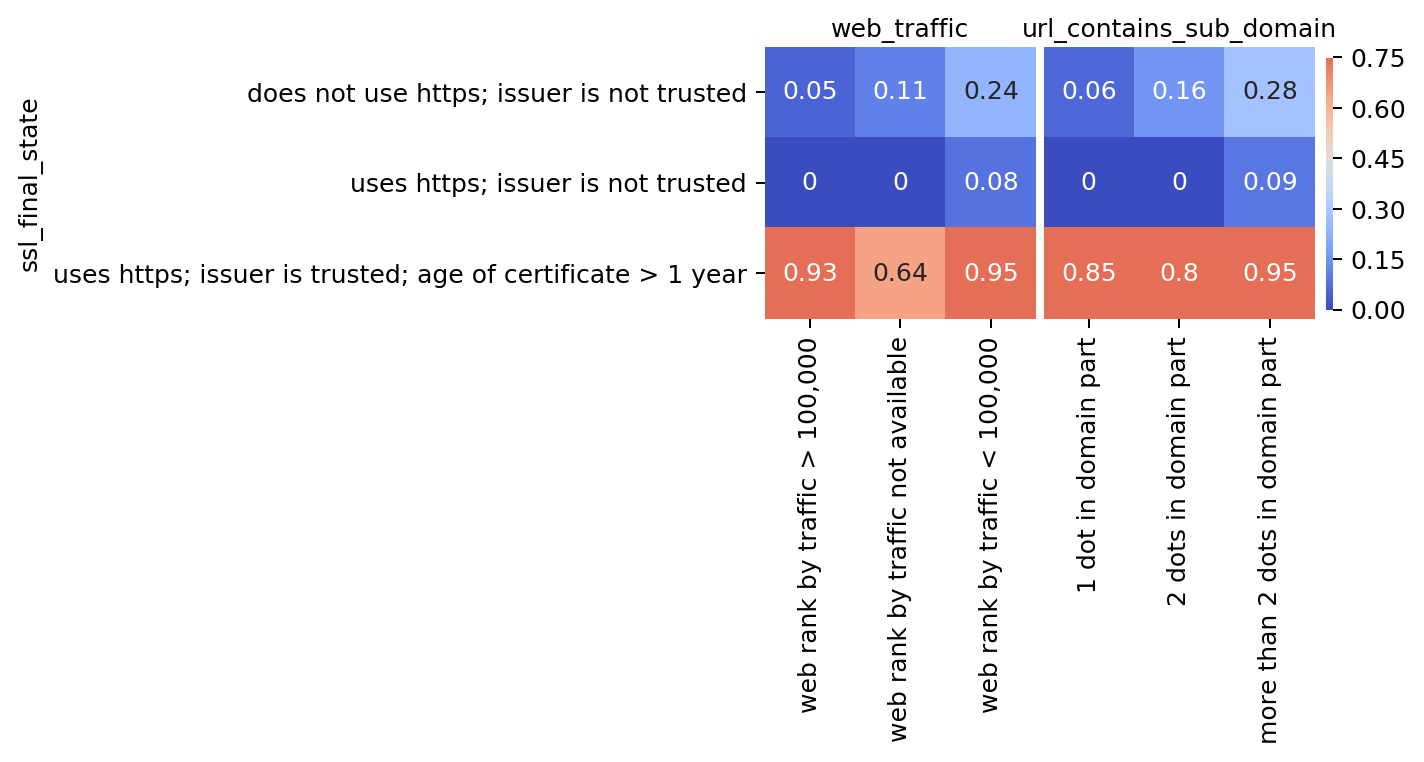

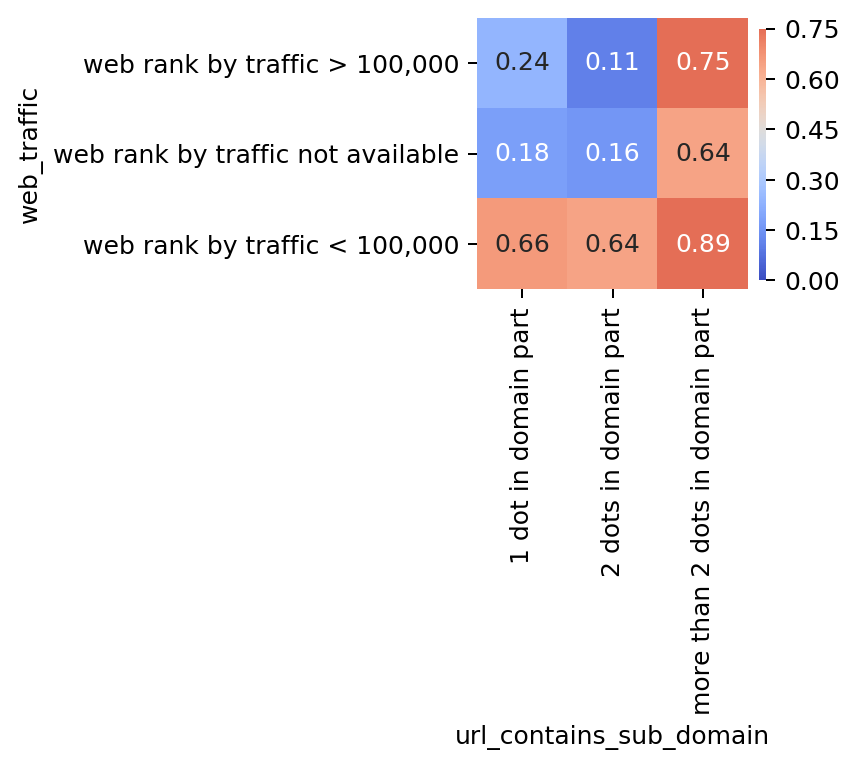

In [34]:
prop_phish_heatmap(high_heatmap_dict, high_interesting_columns)

In [35]:
low_heatmap_dict[('links_pointing_to_page', 'sfh')]

sfh,-1,0,1
links_pointing_to_page,,,
-1,0.62,0.56,0.79
0,0.46,0.64,0.80
1,0.54,0.69,0.77


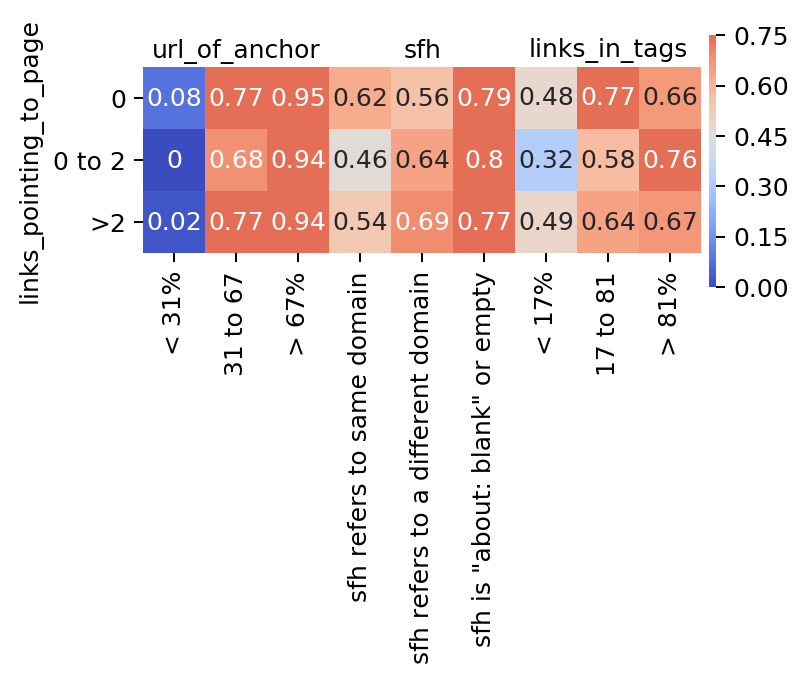

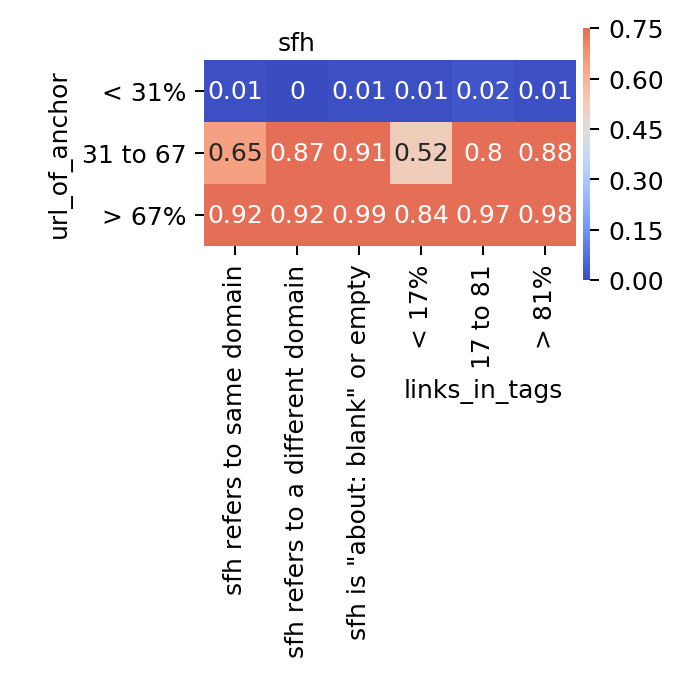

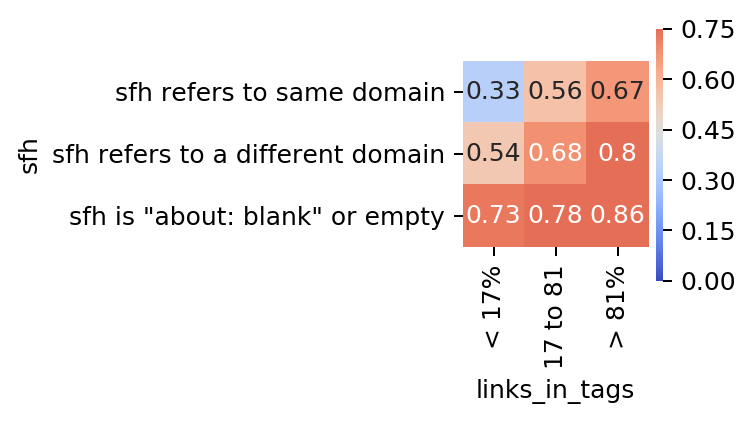

In [36]:
prop_phish_heatmap(low_heatmap_dict, low_interesting_columns)

### Model Building

1. Scikitlearn cheatsheet is a good tool for this part.
2. Several models to consider:
 - regularized logistic regression, meaning lasso or ridge
 - KNN, but this is not always a good mehtod
 - XGBoost
 - Random Forest
 - Ultimately it will be an ensemble of these models.
3. SVM/Trees/linear regression can also be considered.

#### Initial train/test split

In [60]:
# help from datacamp
from sklearn.model_selection import train_test_split

x = data.iloc[:,0:30]
y = data.iloc[:,30]

# Split into training and test set
# Stratifying to make sure the split of phisihng/valid stays equal across train/test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2, stratify=y)

In [65]:
# Making sure stratifying worked.
np.mean(y_train), np.mean(y_test)

(0.5569914706642544, 0.5568284594513114)

#### Logistic Regression
Not a bad starting point

In [268]:
# help from datacamp
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-10, 10, 100)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Tuned Logistic Regression Parameters: {'C': 0.7924828983539186}
Best score is 0.9284052726802792


##### Making sure that I picked the proper C value.

In [222]:
# Making sure that we picked the proper C value.

from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(logreg, x_train, y_train, "C", c_space, cv=5)

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [276]:
# Generalized function that returns a df with min, mean, max of the score for each C value

def min_mean_max_scores(scores):
    scores_df = pd.DataFrame([map(min, scores),
                                    map(np.mean, scores),
                                    map(max, scores)]).transpose()
    scores_df.columns = ['min', 'mean', 'max']

    scores_df.set_index([c_space], inplace = True)
    return scores_df

In [280]:
train_scores_df = min_mean_max_scores(train_scores)
valid_scores_df = min_mean_max_scores(valid_scores)

##### How does random Grid search compare?

In [ ]:
# What values does randsearch pick?
# Let's plot those too
from sklearn.model_selection import RandomizedSearchCV
from collections import defaultdict

rand_logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

rand_search_dict = defaultdict(int)
for i in range(10):
    # Fit it to the data
    rand_logreg_cv.fit(x_train, y_train)

    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(rand_logreg_cv.best_params_)) 
    print("Best score is {}".format(rand_logreg_cv.best_score_))
    rand_search_dict[rand_logreg_cv.best_params_['C']] = rand_logreg_cv.best_score_


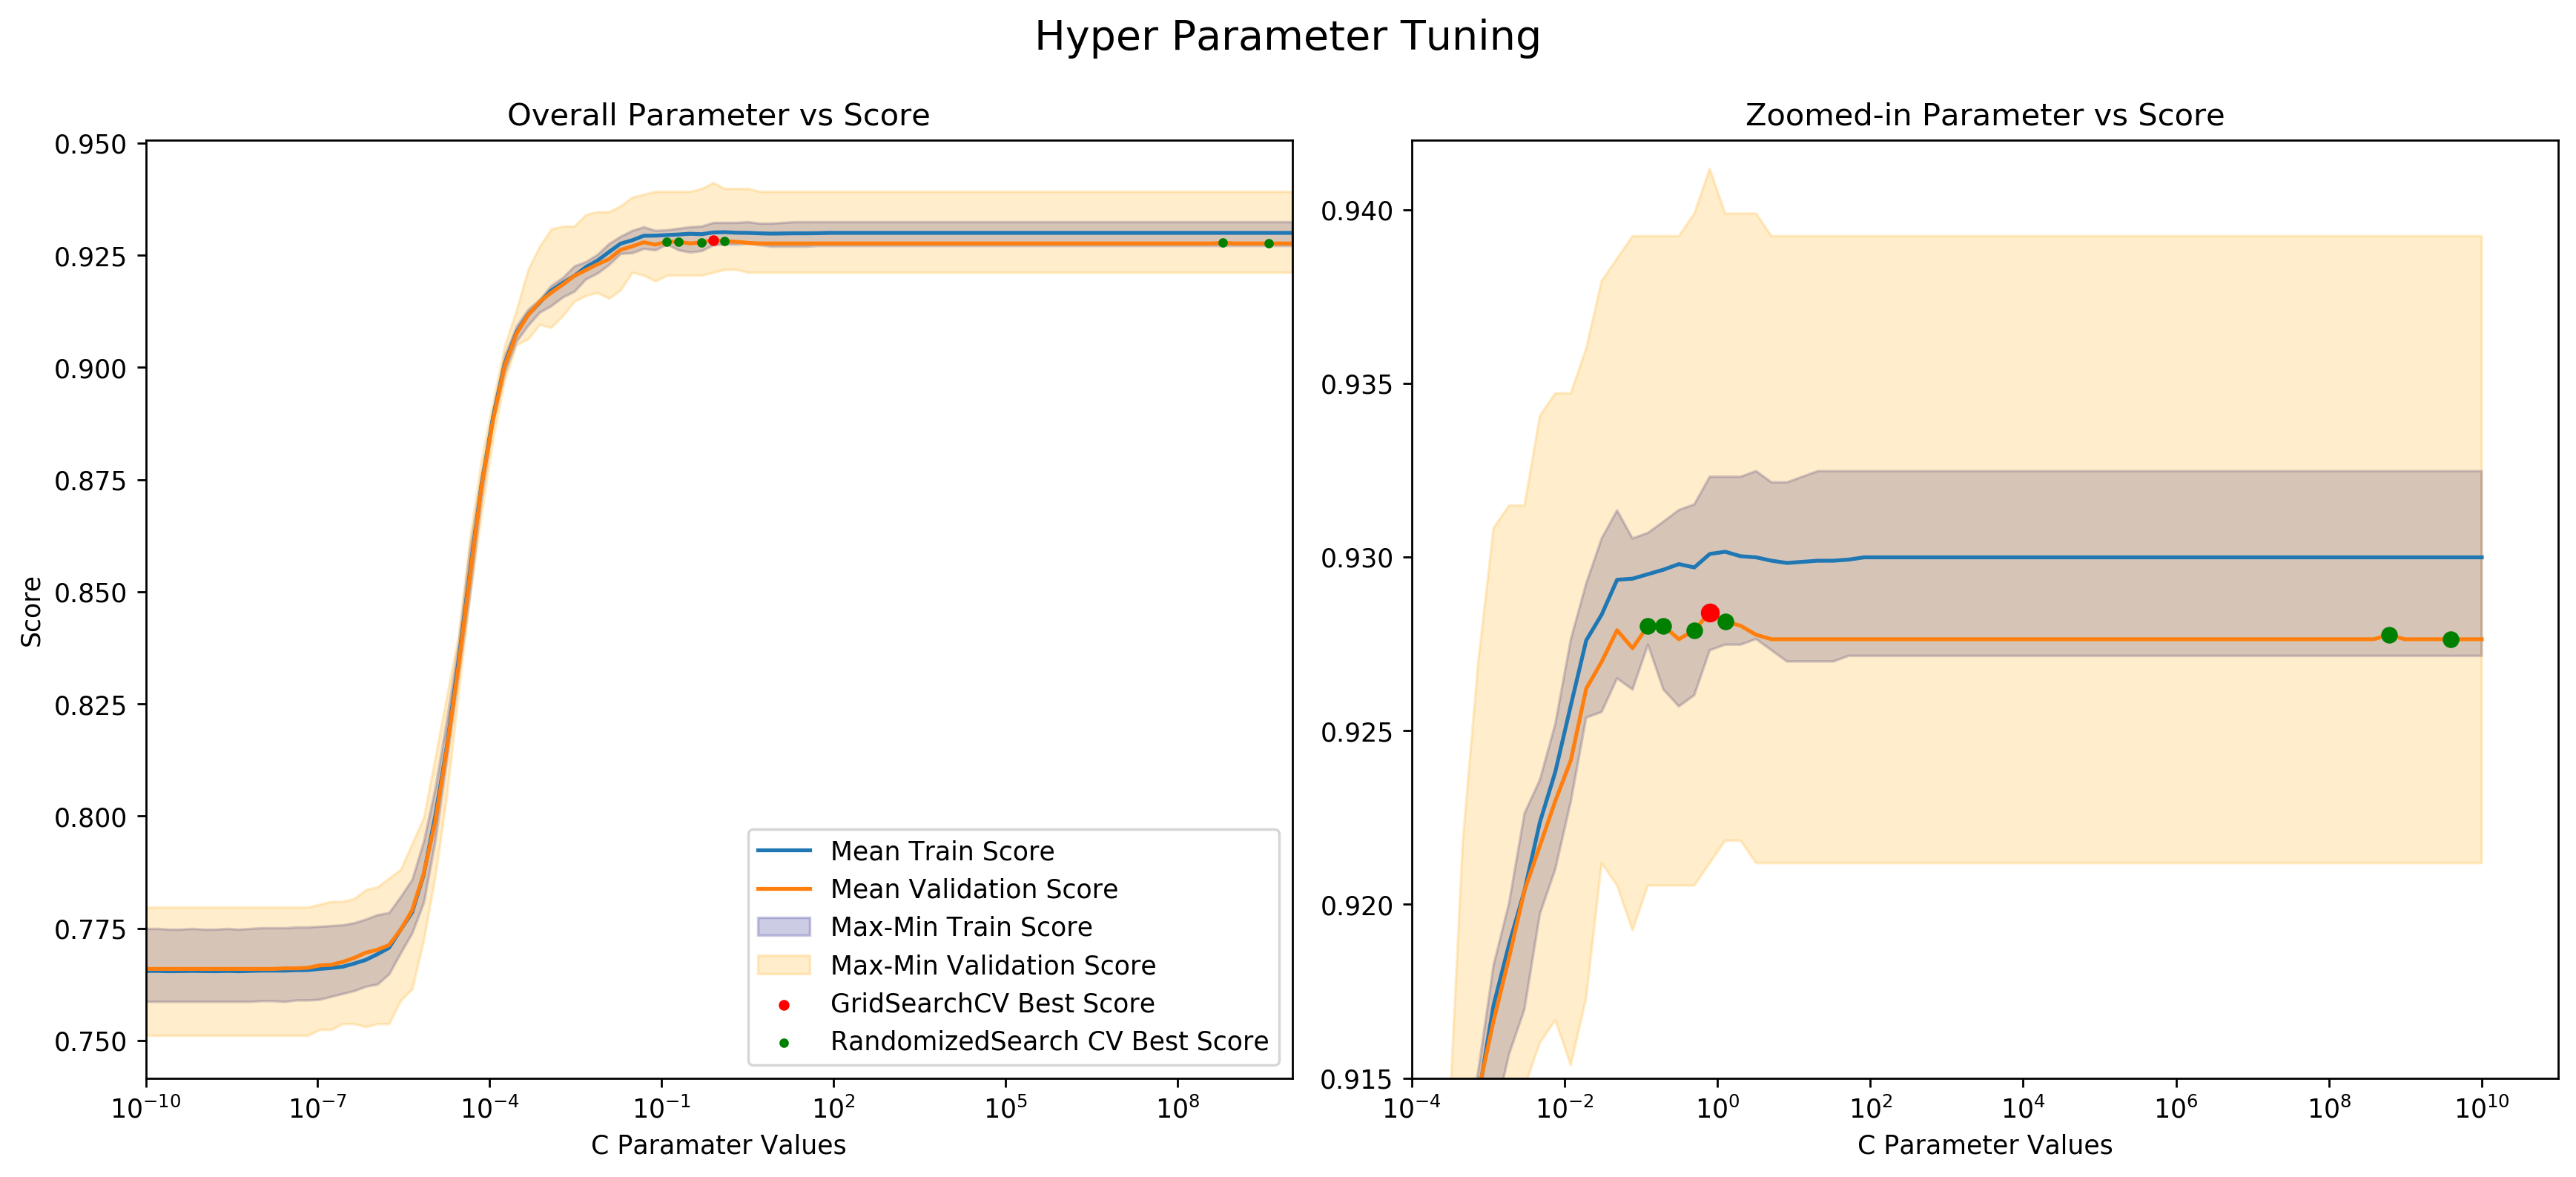

In [297]:
plt.figure(figsize=(14,6), dpi = 250)
plt.suptitle('Hyper Parameter Tuning', fontsize=16, y=1.05)


# First subplot
ax1 = plt.subplot(121)
train_scores_df['mean'].plot()
plt.xscale('log')
ax1.fill_between(train_scores_df.index, train_scores_df['min'],
                 train_scores_df['max'], alpha=0.2,
                 color="navy")

valid_scores_df['mean'].plot()
plt.xscale('log')
ax1.fill_between(valid_scores_df.index, valid_scores_df['min'],
                 valid_scores_df['max'], alpha=0.2,
                 color="orange")
plt.scatter(logreg_cv.best_params_['C'], logreg_cv.best_score_, c = 'red', s = 10, zorder=10) # putting it on top
plt.scatter(rand_c_x, rand_c_y, c = 'green', s = 7, zorder=10)
ax1.legend(labels=['Mean Train Score', 'Mean Validation Score', 'Max-Min Train Score', 'Max-Min Validation Score',
                   'GridSearchCV Best Score', 'RandomizedSearch CV Best Score'])
ax1.set_xlabel('C Paramater Values')
ax1.set_ylabel('Score')
ax1.set_title('Overall Parameter vs Score')


# Second subplot
ax2 = plt.subplot(122)
train_scores_df['mean'].plot()
ax2.fill_between(train_scores_df.index, train_scores_df['min'],
                 train_scores_df['max'], alpha=0.2,
                 color="navy")

valid_scores_df['mean'].plot()
plt.xscale('log')

ax2.fill_between(valid_scores_df.index, valid_scores_df['min'],
                 valid_scores_df['max'], alpha=0.2,
                 color="orange")
plt.ylim((0.915, 0.942))
plt.xlim((10e-5,10e10))
plt.scatter(logreg_cv.best_params_['C'], logreg_cv.best_score_, c = 'red', s = 40, zorder=10)
plt.scatter(rand_c_x, rand_c_y, c = 'green', s = 30, zorder=10)
ax2.set_xlabel('C Parameter Values')
ax2.set_title('Zoomed-in Parameter vs Score')


plt.tight_layout()
plt.show()

### Scratch work